# Regression

This notebook is used to build regression models for each outcome.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
!ls data

aac_intakes.csv          df_dog.csv               master12218.csv
aac_intakes_outcomes.csv df_mod.csv               master_df.csv
aac_outcomes.csv         engineered.csv           master_df_1128.csv
all_categoricals.csv     group_shade.csv          master_df_1129.csv
concat_backup.csv        hour_ids.csv             model12218.csv
df_cat.csv               hr_name.csv


In [4]:
df = pd.read_csv('./data/master12218.csv', index_col=0)

## Separate outcome models

In [19]:
df = df[~df.duplicated()]

In [20]:
df_adopt.shape

(33455, 22)

In [21]:
df_adopt.dropna().shape

(27829, 22)

In [8]:
df_adopt = df[df['outcome_type'] == 'Adoption']
df_trans = df[df['outcome_type'] == 'Transfer']
df_return = df[df['outcome_type'] == 'Return to Owner']
df_euth = df[df['outcome_type'] == 'Euthanasia']
df_death = df[df['outcome_type'] == 'Died']

Text(0.5,1,'Days in shelter for adopted animals')

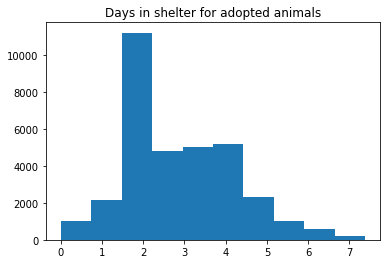

In [25]:
plt.hist(np.log1p(df_adopt['days_in_shelter']))
plt.title('Days in shelter for adopted animals')

Text(0.5,1,'Days in shelter for transferred animals')

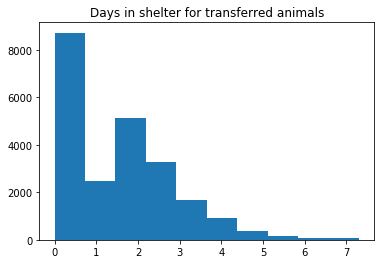

In [26]:
plt.hist(np.log1p(df_trans['days_in_shelter']))
plt.title('Days in shelter for transferred animals')

Text(0.5,1,'Days in shelter for euthanized animals')

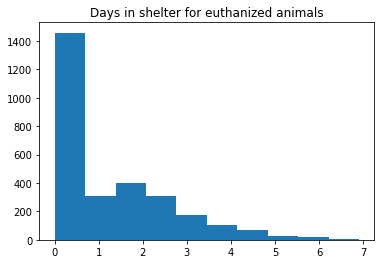

In [27]:
plt.hist(np.log1p(df_euth['days_in_shelter']))
plt.title('Days in shelter for euthanized animals')

Text(0.5,1,'Days in shelter for return to owner')

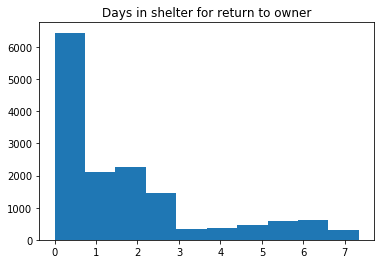

In [28]:
plt.hist(np.log1p(df_return['days_in_shelter']))
plt.title('Days in shelter for return to owner')

Text(0.5,1,'Days in shelter for death')

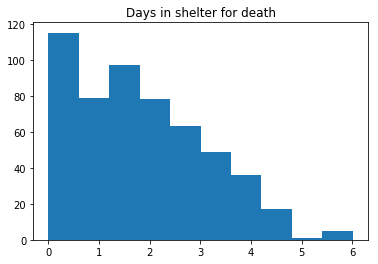

In [29]:
plt.hist(np.log1p(df_death['days_in_shelter']))
plt.title('Days in shelter for death')

## One-hot encode

In [35]:
df_dummies = pd.read_csv('./data/model12218.csv', index_col = 0)

In [36]:
df_model = df_dummies.copy()
df_model = df_model.drop(labels=['outcome_type'], axis=1)
df_model = df_model.drop(labels=['given_name'], axis=1)

In [38]:
X = pd.concat([pd.get_dummies(df_model[['animal_type', 'dow', 'fixed_status', 'group', 'intake_condition',
                              'intake_season', 'intake_type', 'simple_color', 'simple_group',
                              'shade', 'hour_in']]), df_model[['age', 'gender', 'mix', 'name_freq']]], axis=1)

In [40]:
X = pd.concat([X, pd.get_dummies(df_model['dow'])], axis=1)

In [46]:
X.drop(labels=['dow'], axis=1, inplace=True)

In [55]:
hour_dummies = pd.get_dummies(df_model['hour_in'])

In [59]:
hour_dummies.columns = list(map(lambda x: 'hr_' + str(x), hour_dummies.columns))

In [63]:
X = pd.concat([X, hour_dummies], axis=1).drop(labels=['hour_in'], axis=1)

In [69]:
y = df_model['days_in_shelter']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2325)

In [84]:
df_adopt = df_adopt[~df_adopt.duplicated()]
df_trans = df_trans[~df_trans.duplicated()]
df_euth = df_euth[~df_euth.duplicated()]
df_death = df_death[~df_death.duplicated()]
df_return = df_return[~df_return.duplicated()]

In [86]:
df_other = df[df['outcome_type'] != 'Adoption']

In [87]:
df_other = df_other[~df_other.duplicated()]

## Adoption regression

In [85]:
df_adopt.duplicated().sum()

0